# E01

## Approach
Find ix given the last two characters.

In [1]:
import torch

In [2]:
words = list(open('names.txt', 'r').read().splitlines())
words[:3]

['emma', 'olivia', 'ava']

In [3]:
l = ['.'] + sorted(set(i for w in words for i in w))
stoi = {s: i for i, s in enumerate(l)}
itos = {i: s for i, s in enumerate(l)}

In [4]:
# E02
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]


In [5]:
N = torch.zeros([27, 27, 27], dtype=torch.int32)
for w in words_test:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        N[stoi[c1], stoi[c2], stoi[c3]] += 1
N

tensor([[[   0, 3494, 1052,  ...,   99,  458,  793],
         [   0,  165,  138,  ...,   22,  145,  125],
         [   0,  146,    0,  ...,    0,    4,    0],
         ...,
         [   0,   38,    0,  ...,    1,   17,   11],
         [   0,  214,    0,  ...,    0,    0,    6],
         [   0,  394,    0,  ...,    0,   72,    0]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  44,    0,    3,  ...,    0,   16,    5],
         [  28,   27,   19,  ...,    0,    5,    0],
         ...,
         [  10,    4,    0,  ...,   10,    4,    4],
         [ 134,  340,    9,  ...,    0,   19,   28],
         [  30,  112,    0,  ...,    0,    6,   15]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  23,    2,    1,  ...,    3,   36,    3],
         [   0,    8,    0,  ...,    0,    5,    0],
         ...,
         [   0,    0,    0,  ...,    0,    0,    0],
         [  46,    4,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0]],

In [6]:
N.shape

torch.Size([27, 27, 27])

In [7]:
N += 1
P = N.float()
P /= P.sum(2, keepdim=True)
P[0]

tensor([[3.8982e-05, 1.3624e-01, 4.1048e-02, 4.8922e-02, 5.2859e-02, 4.8220e-02,
         1.3098e-02, 2.1908e-02, 2.7092e-02, 1.8204e-02, 7.3987e-02, 9.2972e-02,
         5.0014e-02, 7.6677e-02, 3.3602e-02, 1.3020e-02, 1.4774e-02, 2.8067e-03,
         5.2664e-02, 6.4827e-02, 4.1750e-02, 2.4948e-03, 1.0642e-02, 9.3946e-03,
         3.8982e-03, 1.7893e-02, 3.0952e-02],
        [2.8401e-04, 4.7146e-02, 3.9477e-02, 8.8043e-03, 7.3275e-02, 1.2780e-02,
         3.1241e-03, 5.3962e-03, 2.2437e-02, 3.4649e-02, 8.2363e-03, 2.0449e-02,
         1.4257e-01, 8.8327e-02, 1.3831e-01, 2.5561e-03, 2.8401e-03, 1.9881e-03,
         1.0764e-01, 4.2886e-02, 1.5621e-02, 3.9761e-02, 5.6518e-02, 1.1360e-03,
         6.5322e-03, 4.1465e-02, 3.5785e-02],
        [9.2678e-04, 1.3624e-01, 9.2678e-04, 9.2678e-04, 9.2678e-04, 1.7609e-01,
         9.2678e-04, 9.2678e-04, 1.0195e-02, 3.6145e-02, 9.2678e-04, 9.2678e-04,
         6.3021e-02, 9.2678e-04, 9.2678e-04, 6.1168e-02, 9.2678e-04, 9.2678e-04,
         4.8285e-

In [8]:
for i in range(10):
    ix = 0
    out = ['.', '.']
    while True:
        ix = torch.multinomial(P[stoi[out[-2]], stoi[out[-1]]], 1, replacement=True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

..on
..lee
..mon
..da
..xez
..reighaoizaiyrielynes
..dal
..caliza
..ka
..izalei


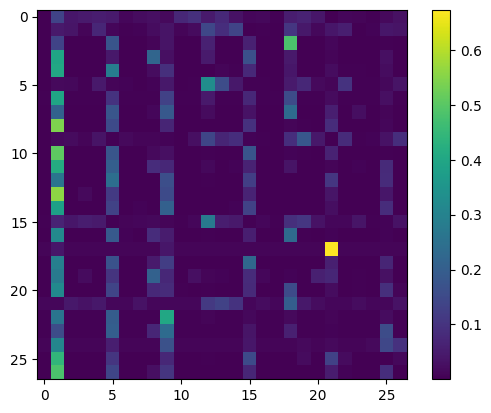

In [9]:
import matplotlib.pyplot as plt

plt.imshow(P[0])
plt.colorbar()

In [10]:
P[0][0]

tensor([3.8982e-05, 1.3624e-01, 4.1048e-02, 4.8922e-02, 5.2859e-02, 4.8220e-02,
        1.3098e-02, 2.1908e-02, 2.7092e-02, 1.8204e-02, 7.3987e-02, 9.2972e-02,
        5.0014e-02, 7.6677e-02, 3.3602e-02, 1.3020e-02, 1.4774e-02, 2.8067e-03,
        5.2664e-02, 6.4827e-02, 4.1750e-02, 2.4948e-03, 1.0642e-02, 9.3946e-03,
        3.8982e-03, 1.7893e-02, 3.0952e-02])

In [11]:
# loss
nll = 0.0
n = 0
for w in words_dev:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        prob = P[stoi[c1], stoi[c2], stoi[c3]]
        nll += -prob.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(101839.9219), 2.234703779220581


# E02

In [12]:
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]

In [13]:
words_dev

['sevak',
 'knixon',
 'alexios',
 'ahaana',
 'merrick',
 'draysen',
 'doron',
 'jazaria',
 'kalkidan',
 'margot',
 'laren',
 'halia',
 'braelin',
 'lydiana',
 'breyer',
 'jibreel',
 'dariya',
 'dmyah',
 'luzelena',
 'yonatan',
 'louna',
 'tailer',
 'grizzly',
 'aysel',
 'rhett',
 'dessie',
 'rasheem',
 'essiah',
 'eyleen',
 'zoha',
 'blessin',
 'niara',
 'hellen',
 'tailyn',
 'travez',
 'camil',
 'christie',
 'ambriella',
 'levy',
 'haeven',
 'wenona',
 'skarlett',
 'dessa',
 'camir',
 'jlynn',
 'dkari',
 'kynslie',
 'queena',
 'kevon',
 'halley',
 'draylon',
 'ellinor',
 'jaxxton',
 'can',
 'lavena',
 'asaad',
 'galileo',
 'jovelyn',
 'emanuelly',
 'basim',
 'yael',
 'ailynn',
 'beauty',
 'kmiyah',
 'evamaria',
 'arianny',
 'master',
 'oluwademilade',
 'fancy',
 'yichen',
 'evrhett',
 'islarose',
 'holton',
 'kimorah',
 'antonina',
 'tamzin',
 'mikey',
 'joseangel',
 'jceon',
 'donny',
 'tulsa',
 'analina',
 'giulio',
 'absalat',
 'kallen',
 'bol',
 'romell',
 'kalayna',
 'diago',
 'b

## Bigram Model (Probabilistic)

In [14]:
Nbi = torch.zeros([27, 27])
for w in words:
    word = "." + w + "."
    for c1, c2 in zip(word, word[1:]):
        Nbi[stoi[c1], stoi[c2]] += 1
N

tensor([[[   1, 3495, 1053,  ...,  100,  459,  794],
         [   1,  166,  139,  ...,   23,  146,  126],
         [   1,  147,    1,  ...,    1,    5,    1],
         ...,
         [   1,   39,    1,  ...,    2,   18,   12],
         [   1,  215,    1,  ...,    1,    1,    7],
         [   1,  395,    1,  ...,    1,   73,    1]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  45,    1,    4,  ...,    1,   17,    6],
         [  29,   28,   20,  ...,    1,    6,    1],
         ...,
         [  11,    5,    1,  ...,   11,    5,    5],
         [ 135,  341,   10,  ...,    1,   20,   29],
         [  31,  113,    1,  ...,    1,    7,   16]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  24,    3,    2,  ...,    4,   37,    4],
         [   1,    9,    1,  ...,    1,    6,    1],
         ...,
         [   1,    1,    1,  ...,    1,    1,    1],
         [  47,    5,    1,  ...,    1,    1,    1],
         [   1,    1,    1,  ...,    1,    1,    1]],

In [15]:
Pbi = (Nbi + 0).float()
Pbi /= Pbi.sum(1, keepdim=True)
Pbi

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [16]:
for i in range(5):
    ix = 0
    out = []
    while True:
        ix = torch.multinomial(Pbi[ix], 1, True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

ry
abenycensl
kanniaskle
sarivyawyn
a


In [17]:
Pbi[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
# loss
nll = 0.
n = 0
for w in words_dev:
    word = "." + w + "."
    for ch1, ch2 in zip(word, word[1:]):
        probs = Pbi[stoi[ch1], stoi[ch2]]
        nll += -probs.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(111790.5391), 2.4522998332977295


## Single Neuron Prediction
Bi-gram

In [19]:
xs, ys = [], []
for w in words:
    word = '.' + w + '.'
    for x, y in zip(word, word[1:]):
        xs.append(stoi[x])
        ys.append(stoi[y])
xs[:5], ys[:5]

([0, 5, 13, 13, 1], [5, 13, 13, 1, 0])

In [20]:
import torch.nn.functional as F

xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()
xenc.dtype

torch.float32

In [21]:
W = torch.randn((27, 27), requires_grad=True)
W.shape

torch.Size([27, 27])

In [22]:
for i in range(20):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i+1, loss.item(), sep=": ")

    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


1: 3.731372117996216
2: 3.3845367431640625
3: 3.1687686443328857
4: 3.026329517364502
5: 2.926896095275879
6: 2.856004476547241
7: 2.8033008575439453
8: 2.7624125480651855
9: 2.7295844554901123
10: 2.702570676803589
11: 2.6799604892730713
12: 2.6608011722564697
13: 2.644404172897339
14: 2.6302483081817627
15: 2.6179254055023193
16: 2.607114315032959
17: 2.5975592136383057
18: 2.5890564918518066
19: 2.5814435482025146
20: 2.5745882987976074


In [23]:
g = torch.Generator().manual_seed(2147483647)

out = ["."]
while True:
    ix = stoi[out[-1]]
    x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = x @ W
    count = logits.exp()
    prob = count / count.sum(1, keepdim=True)
    pred = prob.multinomial(num_samples=1, replacement=True, generator=g)
    out.append(itos[pred.item()])
    if out[-1] == ".":
        break
print(*out, sep="")

.cexza.


Tri-gram

In [36]:
sstoi = {}

n = 0
for i in range(27):
    for j in range(27):
        sstoi[(i, j)] = n
        n += 1

In [37]:
xss = []
ys = []

for w in words:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        xss.append(sstoi[(stoi[c1], stoi[c2])])
        ys.append(stoi[c3])

In [47]:
xs = F.one_hot(torch.tensor(xss), num_classes=n).float()
W = torch.randn([729, 27], requires_grad=True)

In [76]:

for i in range(10):
    logits = xs @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i, loss, sep=": ")
    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


0: tensor(2.3288, grad_fn=<NegBackward0>)
1: tensor(2.4000, grad_fn=<NegBackward0>)
2: tensor(2.3282, grad_fn=<NegBackward0>)
3: tensor(2.3336, grad_fn=<NegBackward0>)
4: tensor(2.4084, grad_fn=<NegBackward0>)
5: tensor(2.3323, grad_fn=<NegBackward0>)
6: tensor(2.3311, grad_fn=<NegBackward0>)
7: tensor(2.3937, grad_fn=<NegBackward0>)
8: tensor(2.3227, grad_fn=<NegBackward0>)
9: tensor(2.3286, grad_fn=<NegBackward0>)


In [ ]:
out = [".", "."]

In [65]:
xs.shape

torch.Size([228146, 729])

In [29]:
t = torch.tensor([[1, 2, 3], [12, 13, 14]])
s = torch.tensor([[1, 2], [2, 3], [3, 4]])
t @ s

tensor([[ 14,  20],
        [ 80, 119]])

In [88]:
out = ['.', '.']
while True:
    ix = sstoi[(stoi[out[-2]], stoi[out[-1]])]
    x = F.one_hot(torch.tensor([ix]), num_classes=n).float()
    logits = x @ W
    count = logits.exp()
    probs = count / count.sum(1, keepdim=True)
    pred = probs.multinomial(1, True).item()
    out.append(itos[pred])
    if out[-1] == '.':
        break
print(*out, sep="")

..vihne.


### 1x54 approach
TODO